# Feature Selection

### The purpose of this notebook is not to select the final variables that will be included during the modelling section. For now we just want to know what feature selection method is the most adequate and to have an idea of the number of variables that can get selected.

### In the modelling section each store-product combination will have its own feature selection process (completely automated).

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE

from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance

c:\Users\Luis\miniconda3\envs\retail\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Load the data

In [2]:
df = pd.read_pickle("../data/df_feature_engineering.pickle")
df

,date,store_id,item_id,year_2013,year_2014,year_2015,month_1,month_2,month_3,month_4,...,sales_mvgmax_6,sales_mvgmax_7,sales_mvgmax_8,sales_mvgmax_9,sales_mvgmax_10,sales_mvgmax_11,sales_mvgmax_12,sales_mvgmax_13,sales_mvgmax_14,sales_mvgmax_15
0,2013-01-16,CA_3,FOODS_3_090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
1,2013-01-17,CA_3,FOODS_3_090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
2,2013-01-18,CA_3,FOODS_3_090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
3,2013-01-19,CA_3,FOODS_3_090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,281.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
4,2013-01-20,CA_3,FOODS_3_090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20975,2015-11-26,CA_4,FOODS_3_714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,15.0,15.0,15.0,15.0,15.0,17.0,17.0,17.0,17.0,17.0
20976,2015-11-27,CA_4,FOODS_3_714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
20977,2015-11-28,CA_4,FOODS_3_714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
20978,2015-11-29,CA_4,FOODS_3_714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0


## Supervised methods

#### Separate x and y

In [3]:
target = "sales"
x = df.drop(columns=["sales","date","store_id","item_id"]).copy()
y = df[target].copy()

### Mutual information

#### Create a function to plot the output ranking

In [4]:
def ranking_mi(mutual_selector, mode="table"):
    '''''
    Function that computes the feature importance of each variable of the
    dataset x, creates a dataframe with the ordered ranking from more to less
    important and returns either the dataframe or a plot of the dataframe.
    '''''
    ranking_mi = pd.DataFrame(mutual_selector, index=x.columns).reset_index()
    ranking_mi.columns = ["variable", "importance_mi"]
    ranking_mi = ranking_mi.sort_values(by="importance_mi", ascending=False)
    ranking_mi["ranking_mi"] = np.arange(0, ranking_mi.shape[0])

    if mode=="table":
        return ranking_mi
    else:
        g = ranking_mi["importance_mi"].sort_values().plot(kind="barh", figsize=(12,40))
        g.set_yticklabels(ranking_mi.sort_values(by="importance_mi")["variable"])
    return g
    

#### Plot the ranking

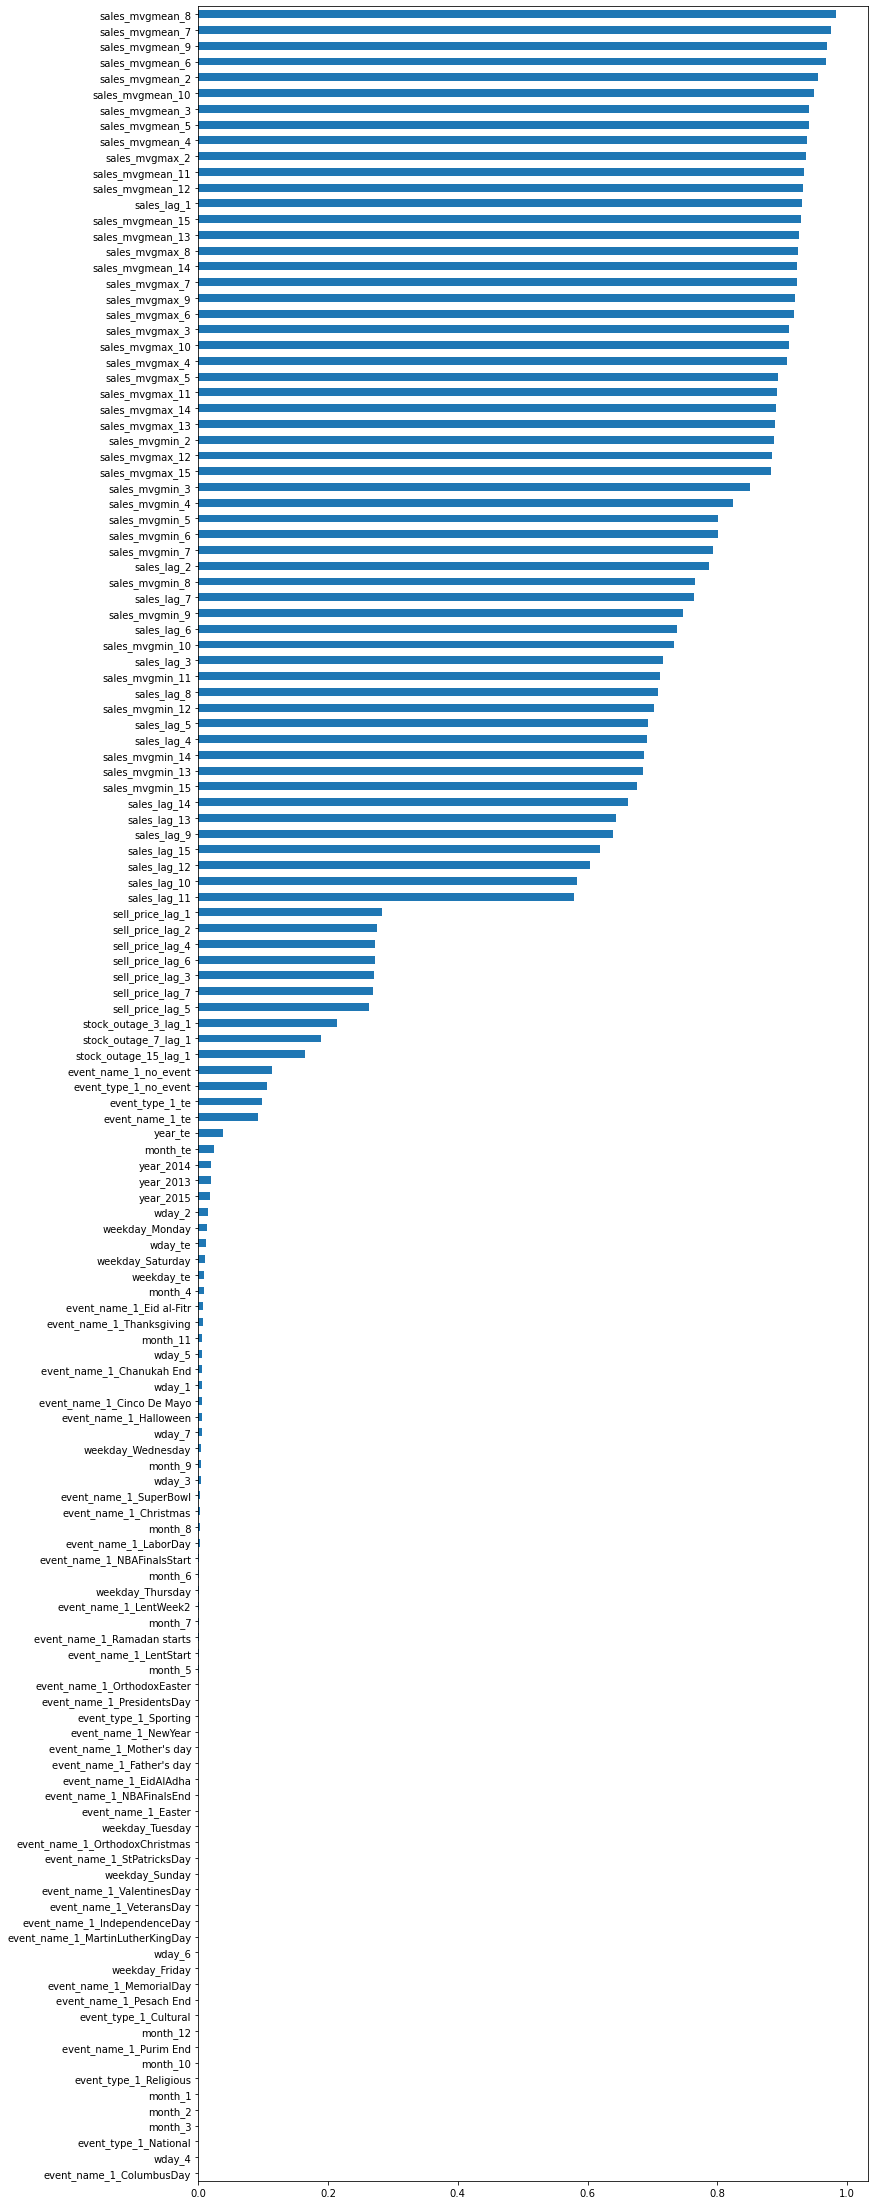

In [5]:
mutual_selector = mutual_info_classif(x,y)
ranking_mi(mutual_selector, mode="plot");

In [6]:
# It is a bit difficult to check the names on the plot, so let's see the variable names
ranking_mi(mutual_selector, mode="table")["variable"].to_list()

['sales_mvgmean_8',
 'sales_mvgmean_7',
 'sales_mvgmean_9',
 'sales_mvgmean_6',
 'sales_mvgmean_2',
 'sales_mvgmean_10',
 'sales_mvgmean_3',
 'sales_mvgmean_5',
 'sales_mvgmean_4',
 'sales_mvgmax_2',
 'sales_mvgmean_11',
 'sales_mvgmean_12',
 'sales_lag_1',
 'sales_mvgmean_15',
 'sales_mvgmean_13',
 'sales_mvgmax_8',
 'sales_mvgmean_14',
 'sales_mvgmax_7',
 'sales_mvgmax_9',
 'sales_mvgmax_6',
 'sales_mvgmax_3',
 'sales_mvgmax_10',
 'sales_mvgmax_4',
 'sales_mvgmax_5',
 'sales_mvgmax_11',
 'sales_mvgmax_14',
 'sales_mvgmax_13',
 'sales_mvgmin_2',
 'sales_mvgmax_12',
 'sales_mvgmax_15',
 'sales_mvgmin_3',
 'sales_mvgmin_4',
 'sales_mvgmin_5',
 'sales_mvgmin_6',
 'sales_mvgmin_7',
 'sales_lag_2',
 'sales_mvgmin_8',
 'sales_lag_7',
 'sales_mvgmin_9',
 'sales_lag_6',
 'sales_mvgmin_10',
 'sales_lag_3',
 'sales_mvgmin_11',
 'sales_lag_8',
 'sales_mvgmin_12',
 'sales_lag_5',
 'sales_lag_4',
 'sales_mvgmin_14',
 'sales_mvgmin_13',
 'sales_mvgmin_15',
 'sales_lag_14',
 'sales_lag_13',
 'sales_

#### Choose how many variable we want in.

In [7]:
n_variables = 71

#### Take the name of the variables we want to be selected.

In [8]:
variables_mi = ranking_mi(mutual_selector).iloc[0:n_variables]["variable"]
variables_mi

116          sales_mvgmean_8
115          sales_mvgmean_7
117          sales_mvgmean_9
114          sales_mvgmean_6
110          sales_mvgmean_2
               ...          
80     stock_outage_15_lag_1
59     event_name_1_no_event
64     event_type_1_no_event
70           event_type_1_te
69           event_name_1_te
Name: variable, Length: 71, dtype: object

#### Create a dataframe with the selected variables.

In [9]:
x_mi = x[variables_mi].copy()

### Recursive Feature Elimination

#### Instantiate

In [10]:
rfe = RFE(estimator = XGBRegressor(n_jobs = -1, eval_metric='mae'))

#### Train

In [11]:
rfe.fit(x,y)

RFE(estimator=XGBRegressor(base_score=None, booster=None,
                           colsample_bylevel=None, colsample_bynode=None,
                           colsample_bytree=None, enable_categorical=False,
                           eval_metric='mae', gamma=None, gpu_id=None,
                           importance_type=None, interaction_constraints=None,
                           learning_rate=None, max_delta_step=None,
                           max_depth=None, min_child_weight=None, missing=nan,
                           monotone_constraints=None, n_estimators=100,
                           n_jobs=-1, num_parallel_tree=None, predictor=None,
                           random_state=None, reg_alpha=None, reg_lambda=None,
                           scale_pos_weight=None, subsample=None,
                           tree_method=None, validate_parameters=None,
                           verbosity=None))

#### Take the name of the variables we want to be selected.

In [12]:
variables_rfe = x.columns[rfe.support_]
variables_rfe

Index(['year_2013', 'month_2', 'month_3', 'month_11', 'month_12', 'wday_1',
       'wday_2', 'wday_4', 'event_name_1_Christmas', 'event_name_1_SuperBowl',
       'event_name_1_Thanksgiving', 'event_name_1_VeteransDay', 'wday_te',
       'sell_price_lag_1', 'sell_price_lag_2', 'sell_price_lag_4',
       'sell_price_lag_5', 'sell_price_lag_7', 'stock_outage_3_lag_1',
       'sales_lag_1', 'sales_lag_3', 'sales_lag_5', 'sales_lag_6',
       'sales_lag_7', 'sales_lag_8', 'sales_lag_9', 'sales_lag_10',
       'sales_lag_11', 'sales_lag_12', 'sales_lag_13', 'sales_lag_14',
       'sales_lag_15', 'sales_mvgmin_2', 'sales_mvgmin_3', 'sales_mvgmin_4',
       'sales_mvgmin_5', 'sales_mvgmin_6', 'sales_mvgmin_7', 'sales_mvgmin_10',
       'sales_mvgmin_11', 'sales_mvgmin_13', 'sales_mvgmin_14',
       'sales_mvgmin_15', 'sales_mvgmean_2', 'sales_mvgmean_3',
       'sales_mvgmean_4', 'sales_mvgmean_5', 'sales_mvgmean_6',
       'sales_mvgmean_7', 'sales_mvgmean_8', 'sales_mvgmean_9',
       'sales

#### Create a dataframe with the selected variables.

In [13]:
x_rfe = x[variables_rfe].copy()
x_rfe

,year_2013,month_2,month_3,month_11,month_12,wday_1,wday_2,wday_4,event_name_1_Christmas,event_name_1_SuperBowl,...,sales_mvgmax_5,sales_mvgmax_6,sales_mvgmax_7,sales_mvgmax_8,sales_mvgmax_9,sales_mvgmax_10,sales_mvgmax_11,sales_mvgmax_13,sales_mvgmax_14,sales_mvgmax_15
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,281.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,224.0,281.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20975,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,15.0,15.0,15.0,15.0,15.0,17.0,17.0,17.0,17.0
20976,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
20977,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
20978,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0


### Permutation importance

#### Create a function to plot the output ranking

In [14]:
def ranking_per(predictors, permutation):
    '''''
    Function that takes predicting variables as well as a permutation object and
    computes the feature importance of each variable of the dataset x, creates 
    a dataframe with the ordered ranking from more to less important and returns
    the dataframe.
    '''''
    ranking_per = pd.DataFrame({"variable": predictors.columns, "importance_per":permutation.importances_mean}).sort_values(by="importance_per", ascending=False)
    ranking_per["ranking_per"] = np.arange(0, ranking_per.shape[0])
    
    return ranking_per

#### Instantiate and train

In [15]:
import warnings
warnings.filterwarnings(action="ignore", message=r'.*Use subset.*of np.ndarray is not recommended')

xgb = XGBRegressor(use_label_encoder=False, n_jobs = -1, eval_metric="mae")

xgb.fit(x,y)

permutation = permutation_importance(xgb, 
                                     x, y, 
                                     scoring = "neg_mean_absolute_error",
                                     n_repeats=3, n_jobs = -1)

c:\Users\Luis\miniconda3\envs\retail\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


#### Check the outcome and plot the ranking

In [16]:
rank_per = ranking_per(x, permutation)
rank_per

,variable,importance_per,ranking_per
81,sales_lag_1,7.122537,0
115,sales_mvgmean_7,6.799771,1
110,sales_mvgmean_2,2.308118,2
93,sales_lag_13,1.572926,3
67,wday_te,1.484599,4
...,...,...,...
27,weekday_Tuesday,0.000000,133
26,weekday_Thursday,0.000000,134
25,weekday_Sunday,0.000000,135
24,weekday_Saturday,0.000000,136


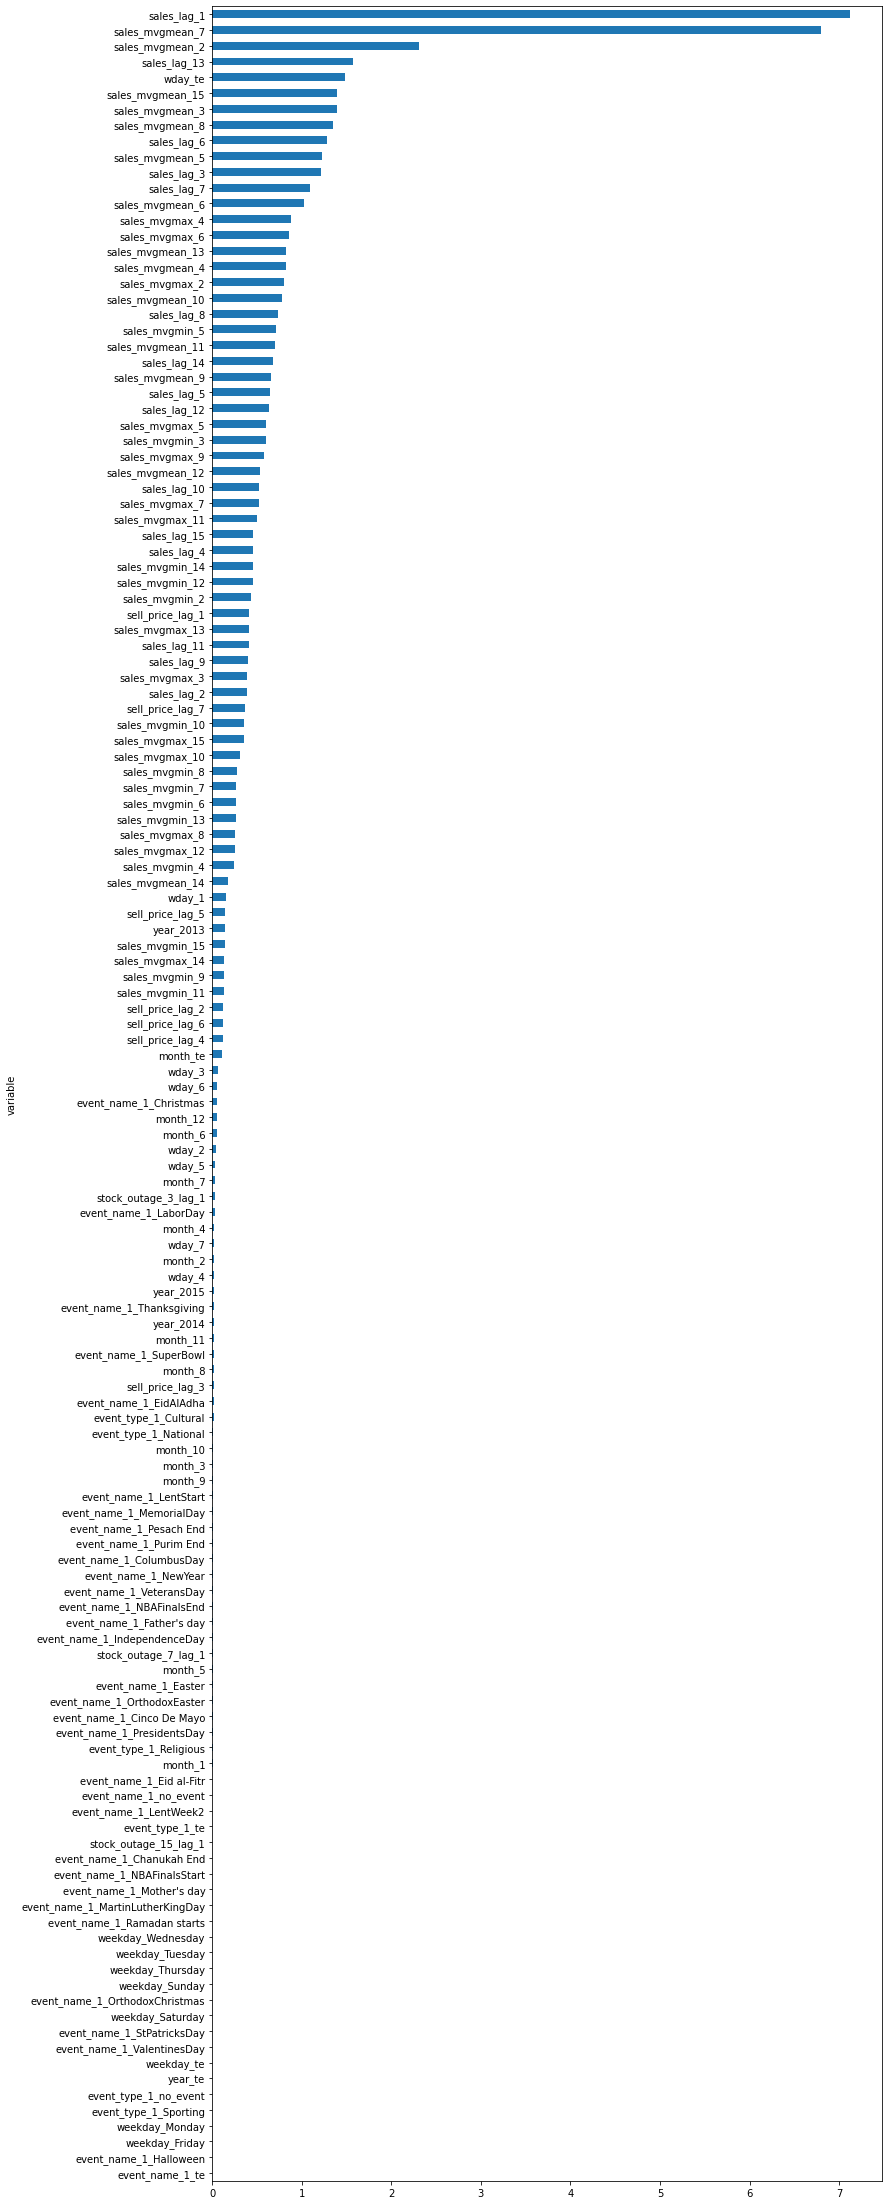

In [17]:
rank_per.set_index("variable")["importance_per"].sort_values().plot(kind="barh",figsize = (12,40));

#### Choose how many variable we want in.

In [18]:
rank_per.reset_index().iloc[50:100]

,index,variable,importance_per,ranking_per
50,100,sales_mvgmin_6,0.263030,50
51,107,sales_mvgmin_13,0.262673,51
52,130,sales_mvgmax_8,0.257397,52
53,134,sales_mvgmax_12,0.250857,53
54,98,sales_mvgmin_4,0.238215,54
55,122,sales_mvgmean_14,0.170529,55
56,15,wday_1,0.150000,56
57,75,sell_price_lag_5,0.145422,57
58,0,year_2013,0.136255,58
59,109,sales_mvgmin_15,0.136164,59


In [19]:
# We can take wday_3 as the threshold
n_variables = 67

#### Take the name of the variables we want to be selected.

In [20]:
variables_per = rank_per.iloc[0:n_variables]["variable"]
variables_per

81          sales_lag_1
115     sales_mvgmean_7
110     sales_mvgmean_2
93         sales_lag_13
67              wday_te
             ...       
105     sales_mvgmin_11
72     sell_price_lag_2
76     sell_price_lag_6
74     sell_price_lag_4
66             month_te
Name: variable, Length: 67, dtype: object

#### Create a dataframe with the selected variables.

In [21]:
x_per = x[variables_per].copy()

## Select the final method

In [22]:
x_selection = x_mi

## Add the variables we removed at the very beginning

#### We need them in the dataframe

In [23]:
x_final = pd.concat([df[["date","store_id","item_id"]], x_selection], axis=1)
x_final

,date,store_id,item_id,sales_mvgmean_8,sales_mvgmean_7,sales_mvgmean_9,sales_mvgmean_6,sales_mvgmean_2,sales_mvgmean_10,sales_mvgmean_3,...,sell_price_lag_3,sell_price_lag_7,sell_price_lag_5,stock_outage_3_lag_1,stock_outage_7_lag_1,stock_outage_15_lag_1,event_name_1_no_event,event_type_1_no_event,event_type_1_te,event_name_1_te
0,2013-01-16,CA_3,FOODS_3_090,233.375,236.000000,228.333333,242.500000,182.0,232.5,215.000000,...,1.25,1.25,1.25,0.0,0.0,0.0,1.0,1.0,28.846066,28.846066
1,2013-01-17,CA_3,FOODS_3_090,230.375,235.142857,228.666667,233.500000,174.5,224.6,185.000000,...,1.25,1.25,1.25,0.0,0.0,0.0,1.0,1.0,28.846066,28.846066
2,2013-01-18,CA_3,FOODS_3_090,227.000,224.428571,223.666667,226.166667,180.5,222.8,173.000000,...,1.25,1.25,1.25,0.0,0.0,0.0,1.0,1.0,28.846066,28.846066
3,2013-01-19,CA_3,FOODS_3_090,224.375,225.857143,226.666667,205.000000,197.0,223.7,195.000000,...,1.25,1.25,1.25,0.0,0.0,0.0,1.0,1.0,28.846066,28.846066
4,2013-01-20,CA_3,FOODS_3_090,242.875,227.428571,239.666667,218.500000,293.0,240.2,252.000000,...,1.25,1.25,1.25,0.0,0.0,0.0,1.0,1.0,28.846066,28.846066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20975,2015-11-26,CA_4,FOODS_3_714,9.375,9.857143,9.666667,10.666667,9.0,9.5,7.000000,...,1.58,1.58,1.58,0.0,0.0,0.0,0.0,0.0,28.351786,28.867779
20976,2015-11-27,CA_4,FOODS_3_714,11.375,12.285714,10.777778,11.833333,14.0,10.9,13.333333,...,1.58,1.58,1.58,0.0,0.0,0.0,1.0,1.0,28.846066,28.846066
20977,2015-11-28,CA_4,FOODS_3_714,12.000,11.571429,11.222222,11.333333,16.0,10.7,12.666667,...,1.58,1.58,1.58,0.0,0.0,0.0,1.0,1.0,28.846066,28.846066
20978,2015-11-29,CA_4,FOODS_3_714,12.250,12.142857,12.555556,11.666667,13.5,11.8,16.333333,...,1.58,1.58,1.58,0.0,0.0,0.0,1.0,1.0,28.846066,28.846066


## Save dataset

In [24]:
# Save X features
x_final.to_pickle("../data/x_final.pickle")

# Save target
y_final = y.copy()
y_final.to_pickle("../data/y_final.pickle")

# Save final feature names
x_final.iloc[0].to_pickle("../data/final_features.pickle")